# Entrenamiento estocástico y por bloques...

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
session = tf.Session()

In [30]:
batch_size = 25

In [31]:
x_vals = np.random.normal(1.0, 0.1, 200)
y_vals = np.repeat(10.0, 200)

In [32]:
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [1, 1]))

In [33]:
my_prediction = tf.matmul(x_data, A)

In [34]:
loss = tf.reduce_mean(tf.square(my_prediction - y_target))

In [35]:
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.025)
train_step = my_optimizer.minimize(loss)

In [36]:
init = tf.global_variables_initializer()

In [37]:
session.run(init)

In [38]:
loss_batch = []
for i in range(200):
    rand_index = np.random.choice(200, size = batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    if (i + 1)% 5 == 0:
        print("Paso # " + str(i + 1) + " A= " + str(session.run(A)))
        temp_loss = session.run(loss, feed_dict = {x_data: rand_x, y_target: rand_y})
        print("Loss: " + str(temp_loss))
        loss_batch.append(temp_loss)

Paso # 5 A= [[3.3421159]]
Loss: 44.879513
Paso # 10 A= [[4.8392425]]
Loss: 28.454767
Paso # 15 A= [[5.9975486]]
Loss: 16.454216
Paso # 20 A= [[6.886505]]
Loss: 9.663511
Paso # 25 A= [[7.5866437]]
Loss: 6.9006224
Paso # 30 A= [[8.126144]]
Loss: 3.2607145
Paso # 35 A= [[8.559698]]
Loss: 3.340426
Paso # 40 A= [[8.87078]]
Loss: 2.746682
Paso # 45 A= [[9.128284]]
Loss: 1.5189246
Paso # 50 A= [[9.303556]]
Loss: 0.99723643
Paso # 55 A= [[9.4498205]]
Loss: 1.1271611
Paso # 60 A= [[9.584968]]
Loss: 0.8863016
Paso # 65 A= [[9.682406]]
Loss: 1.5135705
Paso # 70 A= [[9.751507]]
Loss: 0.7152527
Paso # 75 A= [[9.801011]]
Loss: 1.0413175
Paso # 80 A= [[9.841844]]
Loss: 0.4353977
Paso # 85 A= [[9.872445]]
Loss: 0.9392098
Paso # 90 A= [[9.907333]]
Loss: 0.61153483
Paso # 95 A= [[9.931938]]
Loss: 0.6195961
Paso # 100 A= [[9.914541]]
Loss: 0.85872954
Paso # 105 A= [[9.936766]]
Loss: 0.81556803
Paso # 110 A= [[9.924366]]
Loss: 0.3944384
Paso # 115 A= [[9.93]]
Loss: 0.91494995
Paso # 120 A= [[9.923813]]
Lo

### Estocastic session...

In [39]:
loss_stochastic = []
for i in range(200):
    rand_index = np.random.choice(200, size = 1)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    if (i + 1)% 5 == 0:
        print("Paso # " + str(i + 1) + " A= " + str(session.run(A)))
        temp_loss = session.run(loss, feed_dict = {x_data: rand_x, y_target: rand_y})
        print("Loss: " + str(temp_loss))
        loss_stochastic.append(temp_loss)

Paso # 5 A= [[9.937099]]
Loss: 0.3745294
Paso # 10 A= [[10.020406]]
Loss: 0.81758034
Paso # 15 A= [[9.950231]]
Loss: 0.027728632
Paso # 20 A= [[9.945202]]
Loss: 1.4189807
Paso # 25 A= [[9.981194]]
Loss: 0.25902742
Paso # 30 A= [[9.92738]]
Loss: 0.7865425
Paso # 35 A= [[9.980004]]
Loss: 0.16360405
Paso # 40 A= [[9.878969]]
Loss: 1.26138
Paso # 45 A= [[9.826351]]
Loss: 0.0056248284
Paso # 50 A= [[9.826271]]
Loss: 0.7728568
Paso # 55 A= [[9.865806]]
Loss: 0.06583396
Paso # 60 A= [[9.976678]]
Loss: 1.2275833
Paso # 65 A= [[9.998805]]
Loss: 0.72858334
Paso # 70 A= [[9.94452]]
Loss: 0.0060938336
Paso # 75 A= [[9.906104]]
Loss: 0.5550248
Paso # 80 A= [[9.890508]]
Loss: 0.0060878797
Paso # 85 A= [[9.831707]]
Loss: 0.024058336
Paso # 90 A= [[9.83386]]
Loss: 0.45977125
Paso # 95 A= [[9.804616]]
Loss: 1.21344
Paso # 100 A= [[9.782592]]
Loss: 0.27320963
Paso # 105 A= [[9.837601]]
Loss: 0.004793464
Paso # 110 A= [[9.952822]]
Loss: 0.019974912
Paso # 115 A= [[9.945948]]
Loss: 0.6694077
Paso # 120 A=

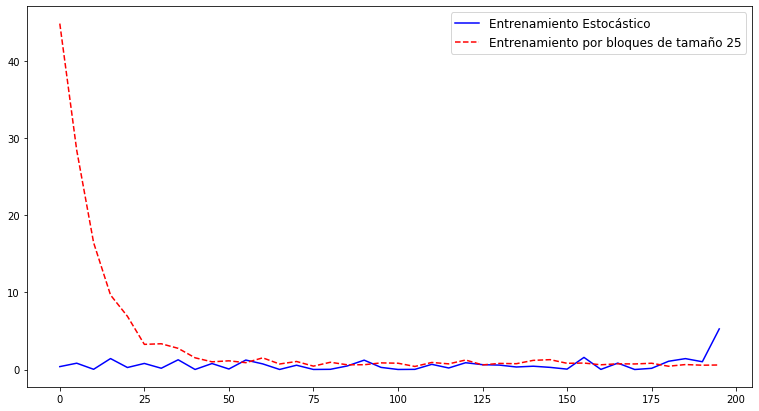

In [47]:
plt.figure(figsize = (13, 7))
plt.plot(range(0, 200, 5), loss_stochastic, "b-", label = "Entrenamiento Estocástico")
plt.plot(range(0, 200, 5), loss_batch, "r--", label = "Entrenamiento por bloques de tamaño 25")
plt.legend(loc = "upper right", prop = {"size": 12})
plt.show()